In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data() #訓練集 / 測試集 

# normalize 數值在 [0,1] 之間
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# flatten 將 28*28 之圖片拉平
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) #改變維度列為 x_train 之數量 / 計算乘積 = [shape-讀取維度長度，自第一維度到最後一維度 (為長*寬=像素數量)]
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) #因此，將 x_train 及 x_test reshape 為 [len(x_train),乘積 = 784]

c:\Users\Kuo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0, 0.5, 'cumulative explained variance')

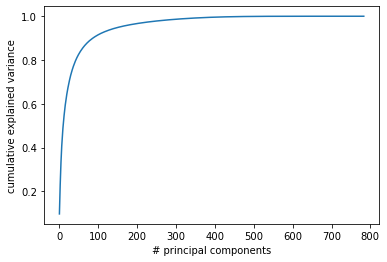

In [2]:
from sklearn.decomposition import PCA #先看一下累積變異數

pca_all = PCA(n_components=784)
pca_all.fit(x_train)
cum_explained_var_ratio = np.cumsum(pca_all.explained_variance_ratio_)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance')

In [3]:
pca_per = PCA(36)
te = pca_per.fit(x_train)
each = te.explained_variance_ratio_
cum = sum(each)
print(cum)

0.7666228911839426


In [4]:
def find_first_digit(d): #找測試集數據的每個數字的第一個instance
    return next(i for i in range(len(y_test)) if y_test[i] == d)

indices = [find_first_digit(d) for d in range(10)] #10次

pca = PCA(36) #36為要保留的主成分個數
model = pca.fit(x_train)

encoded_imgs = model.transform(x_test) #運用訓練好的 x_train，對 x_test 進行降維編碼
decoded_imgs = pca.inverse_transform(encoded_imgs) #解碼，得到重構圖像，回高維

n = len(indices)  # how many digits we will display
fig = plt.figure(figsize=(20, 4))

rows = 3
side = 6

<Figure size 1440x288 with 0 Axes>

In [5]:
# pca_per = PCA(0.95)
# te = pca_per.fit(x_train)
# te.n_components_

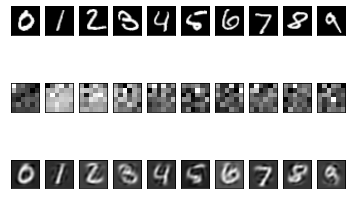

In [6]:
for i in range(n):

    ax = plt.subplot(rows, n, i + 1) #列 = 3，行 = 10，i + 1 為第幾個位置
    plt.imshow(x_test[indices[i]].reshape(28, 28)) #獲得第 i 個圖像數據，並重新調整成 28*28
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoding
    ax = plt.subplot(rows, n, i + 1 + n)
    plt.imshow(((encoded_imgs[indices[i]] + 1) / 2).reshape(side, side))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(rows, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[indices[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
x_train_reduced = model.transform(x_train)
KNN.fit(x_train_reduced,y_train) #用 x_train 降維後特徵模型，訓練knn分類
acc = KNN.score(encoded_imgs,y_test) #測試降維後模型之acc，encoded_imgs為測試集降維後
print(acc)

0.9758


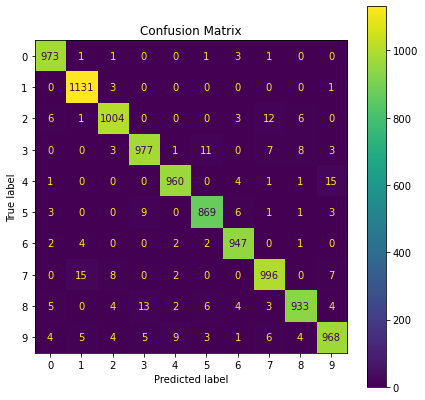

In [8]:
y_pred_knn = KNN.predict(encoded_imgs)
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [9]:
from sklearn.metrics import classification_report
CR = classification_report(y_test, y_pred_knn)
print(CR)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [10]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train_reduced, y_train)
acc_svm = SVM.score(encoded_imgs,y_test)
print(acc_svm)

0.9817


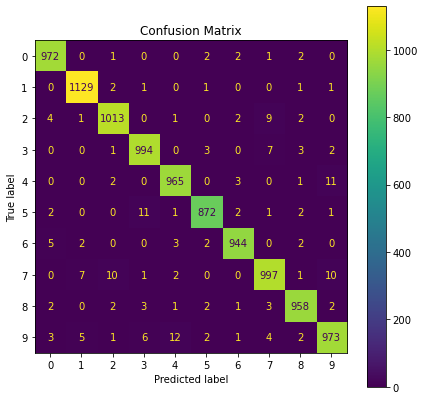

In [13]:
y_pred_svm = SVM.predict(encoded_imgs)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
fig, ax = plt.subplots(figsize=(7, 7))
disp_svm.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [14]:
CR_svm = classification_report(y_test, y_pred_svm)
print(CR_svm)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

